In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

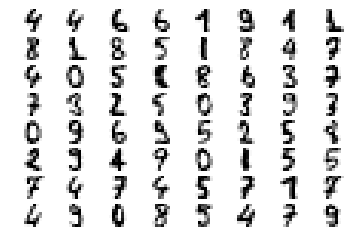

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1, class2):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("Class1:{} #class1:{}".format(class1,len(class1_label)))
    print("Class2:{} #class2:{}".format(class2,len(class2_label)))

    samplesize = len(class1_label) + len(class2_label)
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 67)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []

for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        winner = get_winner(class1, class2)
        winner_list.append(winner)

Class1:0 #class1:162
Class2:1 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.49975 stdev: 0.15508
Best fitness: 0.95385 - size: (2, 13) - species 1 - id 113
Average adjusted fitness: 0.493
Mean genetic distance 2.951, standard deviation 0.484
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 1.229 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56571 stdev: 0.18198
Best fitness: 0.97231 - size: (3, 14) - species 13 - id 251
Average adjusted fitness: 0.455
Mean genetic distance 3.024, standard deviation 0.463
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 1.631 sec (1.430 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63818 stdev: 0.20302
Best fitness: 0.98154 - size: (3, 14) - species 9 - id 408
Average adjusted fitness: 0.501
Mean genetic distance 3.041, standard deviation 0.463
Population of 202 members in 37 species
Total extincti


Population's average fitness: 0.69318 stdev: 0.20051
Best fitness: 0.99068 - size: (3, 14) - species 20 - id 529
Average adjusted fitness: 0.639
Mean genetic distance 2.960, standard deviation 0.493
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 1.588 sec (1.417 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.74077 stdev: 0.17896
Best fitness: 0.99068 - size: (3, 14) - species 20 - id 529
Average adjusted fitness: 0.701
Mean genetic distance 3.048, standard deviation 0.486
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 1.564 sec (1.446 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.73336 stdev: 0.19013
Best fitness: 0.99068 - size: (3, 14) - species 20 - id 529
Average adjusted fitness: 0.553
Mean genetic distance 3.092, standard deviation 0.490
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 1.537 sec (1.461 average)

 ****** Run

Population's average fitness: 0.59683 stdev: 0.17744
Best fitness: 0.96285 - size: (3, 13) - species 4 - id 279
Average adjusted fitness: 0.498
Mean genetic distance 2.965, standard deviation 0.467
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 1.384 sec (1.320 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63102 stdev: 0.18891
Best fitness: 0.96285 - size: (3, 13) - species 4 - id 279
Average adjusted fitness: 0.485
Mean genetic distance 2.983, standard deviation 0.454
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 1.545 sec (1.395 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64249 stdev: 0.19109
Best fitness: 0.96904 - size: (5, 20) - species 19 - id 669
Average adjusted fitness: 0.538
Mean genetic distance 3.013, standard deviation 0.464
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 1.689 sec (1.468 average)

 ****** Runnin

Population's average fitness: 0.77735 stdev: 0.19514
Best fitness: 0.99690 - size: (7, 21) - species 23 - id 3194
Average adjusted fitness: 0.404
Mean genetic distance 3.145, standard deviation 0.507
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 2.014 sec (1.771 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.77205 stdev: 0.19281
Best fitness: 0.99690 - size: (7, 21) - species 23 - id 3194
Average adjusted fitness: 0.327
Mean genetic distance 3.163, standard deviation 0.500
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 1.902 sec (1.785 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.76118 stdev: 0.20472
Best fitness: 0.99690 - size: (7, 21) - species 23 - id 3194
Average adjusted fitness: 0.650
Mean genetic distance 3.163, standard deviation 0.508
Population of 204 members in 23 species
Total extinctions: 0
Generation time: 1.858 sec (1.811 average)

 ******


Population's average fitness: 0.66515 stdev: 0.17646
Best fitness: 0.97853 - size: (5, 18) - species 15 - id 959
Average adjusted fitness: 0.526
Mean genetic distance 3.007, standard deviation 0.507
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 1.583 sec (1.480 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66557 stdev: 0.17703
Best fitness: 0.97853 - size: (5, 18) - species 15 - id 959
Average adjusted fitness: 0.555
Mean genetic distance 3.020, standard deviation 0.513
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 1.680 sec (1.505 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.71092 stdev: 0.17708
Best fitness: 0.97853 - size: (5, 18) - species 15 - id 959
Average adjusted fitness: 0.620
Mean genetic distance 3.027, standard deviation 0.509
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 2.316 sec (1.595 average)

 ****** Run

Population's average fitness: 0.74690 stdev: 0.18060
Best fitness: 0.99693 - size: (4, 15) - species 16 - id 1615
Average adjusted fitness: 0.436
Mean genetic distance 3.204, standard deviation 0.519
Population of 194 members in 25 species
Total extinctions: 0
Generation time: 1.979 sec (2.285 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.74534 stdev: 0.18358
Best fitness: 0.99693 - size: (4, 15) - species 16 - id 1615
Average adjusted fitness: 0.472
Mean genetic distance 3.201, standard deviation 0.523
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 1.875 sec (2.256 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.76743 stdev: 0.17205
Best fitness: 0.99693 - size: (4, 15) - species 16 - id 1615
Average adjusted fitness: 0.358
Mean genetic distance 3.208, standard deviation 0.517
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 2.018 sec (2.160 average)

 ******

Mean genetic distance 3.251, standard deviation 0.479
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 2.562 sec (2.569 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.78682 stdev: 0.19975
Best fitness: 0.99692 - size: (6, 22) - species 24 - id 2430
Average adjusted fitness: 0.565
Mean genetic distance 3.244, standard deviation 0.486
Population of 193 members in 43 species
Total extinctions: 0
Generation time: 2.280 sec (2.546 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.79868 stdev: 0.19291
Best fitness: 0.99692 - size: (6, 22) - species 24 - id 2430
Average adjusted fitness: 0.663
Mean genetic distance 3.271, standard deviation 0.481
Population of 189 members in 44 species
Total extinctions: 0
Generation time: 2.205 sec (2.501 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.80633 stdev: 0.18718
Best fitness: 0.99692 - size: (6, 22) - species 24 - id 2430


Population's average fitness: 0.68849 stdev: 0.21718
Best fitness: 0.99687 - size: (2, 15) - species 24 - id 924
Average adjusted fitness: 0.656
Mean genetic distance 3.100, standard deviation 0.497
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 2.523 sec (2.042 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.73716 stdev: 0.21838
Best fitness: 0.99687 - size: (2, 15) - species 24 - id 924
Average adjusted fitness: 0.690
Mean genetic distance 3.117, standard deviation 0.502
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 3.602 sec (2.237 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.74206 stdev: 0.21377
Best fitness: 1.00000 - size: (7, 24) - species 19 - id 1361

Best individual in generation 8 meets fitness threshold - complexity: (7, 24)
Class1:0 #class1:162
Class2:9 #class2:162

 ****** Running generation 0 ****** 

Population's average fitness: 0.50389 stde

Population's average fitness: 0.69004 stdev: 0.15216
Best fitness: 0.95666 - size: (6, 21) - species 28 - id 1821
Average adjusted fitness: 0.356
Mean genetic distance 3.175, standard deviation 0.514
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 3.987 sec (3.448 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.68886 stdev: 0.14414
Best fitness: 0.95666 - size: (6, 21) - species 28 - id 1821
Average adjusted fitness: 0.263
Mean genetic distance 3.197, standard deviation 0.527
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 3.941 sec (3.534 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67869 stdev: 0.15894
Best fitness: 0.95666 - size: (6, 21) - species 28 - id 1821
Average adjusted fitness: 0.445
Mean genetic distance 3.206, standard deviation 0.534
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 3.601 sec (3.586 average)

 ******

Population's average fitness: 0.71647 stdev: 0.15828
Best fitness: 0.96904 - size: (7, 22) - species 28 - id 4500
Average adjusted fitness: 0.396
Mean genetic distance 3.116, standard deviation 0.545
Population of 206 members in 19 species
Total extinctions: 0
Generation time: 4.484 sec (4.132 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.70839 stdev: 0.17475
Best fitness: 0.96904 - size: (7, 22) - species 28 - id 4500
Average adjusted fitness: 0.515
Mean genetic distance 3.177, standard deviation 0.542
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 4.403 sec (4.183 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.72032 stdev: 0.16776
Best fitness: 0.97214 - size: (8, 24) - species 27 - id 5778
Average adjusted fitness: 0.451
Mean genetic distance 3.165, standard deviation 0.535
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 4.306 sec (4.236 average)

 ******

Population's average fitness: 0.72674 stdev: 0.17040
Best fitness: 0.97214 - size: (7, 26) - species 47 - id 7418
Average adjusted fitness: 0.553
Mean genetic distance 3.210, standard deviation 0.577
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 4.593 sec (4.628 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.71371 stdev: 0.17093
Best fitness: 0.97214 - size: (7, 26) - species 47 - id 7418
Average adjusted fitness: 0.390
Mean genetic distance 3.192, standard deviation 0.570
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 4.696 sec (4.648 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.73043 stdev: 0.17463
Best fitness: 0.97214 - size: (7, 26) - species 47 - id 7418
Average adjusted fitness: 0.476
Mean genetic distance 3.184, standard deviation 0.579
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 4.320 sec (4.649 average)

 ******

Population's average fitness: 0.72118 stdev: 0.17174
Best fitness: 0.99085 - size: (6, 20) - species 33 - id 1802
Average adjusted fitness: 0.371
Mean genetic distance 3.173, standard deviation 0.495
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 3.883 sec (3.839 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.72223 stdev: 0.17699
Best fitness: 0.99085 - size: (6, 20) - species 33 - id 1802
Average adjusted fitness: 0.500
Mean genetic distance 3.168, standard deviation 0.497
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 3.776 sec (3.858 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.72185 stdev: 0.17574
Best fitness: 0.99085 - size: (6, 20) - species 33 - id 1802
Average adjusted fitness: 0.525
Mean genetic distance 3.159, standard deviation 0.487
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 4.008 sec (3.885 average)

 ******

Population's average fitness: 0.73023 stdev: 0.18938
Best fitness: 0.99390 - size: (8, 22) - species 33 - id 4414
Average adjusted fitness: 0.446
Mean genetic distance 3.182, standard deviation 0.569
Population of 194 members in 20 species
Total extinctions: 0
Generation time: 4.466 sec (4.399 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.75063 stdev: 0.18000
Best fitness: 0.99390 - size: (8, 22) - species 33 - id 4414
Average adjusted fitness: 0.452
Mean genetic distance 3.172, standard deviation 0.567
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 4.391 sec (4.408 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.75042 stdev: 0.17448
Best fitness: 0.99390 - size: (8, 22) - species 33 - id 4414
Average adjusted fitness: 0.515
Mean genetic distance 3.151, standard deviation 0.577
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 4.355 sec (4.408 average)

 ******

Population's average fitness: 0.50559 stdev: 0.11335
Best fitness: 0.89506 - size: (2, 13) - species 5 - id 65
Average adjusted fitness: 0.370
Mean genetic distance 2.892, standard deviation 0.474
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 2.985 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57086 stdev: 0.11978
Best fitness: 0.89506 - size: (2, 13) - species 1 - id 65
Average adjusted fitness: 0.387
Mean genetic distance 2.994, standard deviation 0.466
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 3.338 sec (3.161 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60023 stdev: 0.13430
Best fitness: 0.91975 - size: (2, 11) - species 5 - id 533
Average adjusted fitness: 0.392
Mean genetic distance 3.015, standard deviation 0.487
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 3.338 sec (3.220 average)

 ****** Running generation 3 ****

Population's average fitness: 0.72965 stdev: 0.16474
Best fitness: 0.95679 - size: (6, 20) - species 31 - id 3218
Average adjusted fitness: 0.462
Mean genetic distance 3.231, standard deviation 0.493
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 4.156 sec (4.172 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.73260 stdev: 0.16569
Best fitness: 0.95988 - size: (7, 21) - species 31 - id 3612
Average adjusted fitness: 0.507
Mean genetic distance 3.243, standard deviation 0.483
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 4.335 sec (4.196 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.73145 stdev: 0.16041
Best fitness: 0.95988 - size: (7, 21) - species 31 - id 3612
Average adjusted fitness: 0.384
Mean genetic distance 3.218, standard deviation 0.497
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 4.305 sec (4.225 average)

 ******

Population's average fitness: 0.73176 stdev: 0.17116
Best fitness: 0.97840 - size: (8, 30) - species 20 - id 5998
Average adjusted fitness: 0.377
Mean genetic distance 3.159, standard deviation 0.556
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 4.772 sec (4.685 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.74248 stdev: 0.17478
Best fitness: 0.98765 - size: (10, 30) - species 36 - id 7118
Average adjusted fitness: 0.435
Mean genetic distance 3.158, standard deviation 0.548
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 4.504 sec (4.693 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.75530 stdev: 0.15696
Best fitness: 0.99074 - size: (10, 30) - species 36 - id 7264
Average adjusted fitness: 0.333
Mean genetic distance 3.153, standard deviation 0.562
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 4.554 sec (4.699 average)

 ****

Population's average fitness: 0.65991 stdev: 0.15677
Best fitness: 0.96942 - size: (3, 13) - species 14 - id 988
Average adjusted fitness: 0.354
Mean genetic distance 3.046, standard deviation 0.502
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 3.518 sec (3.282 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.67190 stdev: 0.16429
Best fitness: 0.97554 - size: (4, 16) - species 14 - id 1139
Average adjusted fitness: 0.380
Mean genetic distance 3.058, standard deviation 0.512
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 3.668 sec (3.337 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67025 stdev: 0.16557
Best fitness: 0.97554 - size: (4, 16) - species 14 - id 1139
Average adjusted fitness: 0.360
Mean genetic distance 3.074, standard deviation 0.508
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 3.557 sec (3.364 average)

 ****** Ru

Population's average fitness: 0.72655 stdev: 0.17978
Best fitness: 0.97554 - size: (4, 16) - species 14 - id 1139
Average adjusted fitness: 0.463
Mean genetic distance 3.190, standard deviation 0.542
Population of 192 members in 22 species
Total extinctions: 0
Generation time: 4.003 sec (4.058 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.74508 stdev: 0.17126
Best fitness: 0.97554 - size: (4, 16) - species 14 - id 1139
Average adjusted fitness: 0.464
Mean genetic distance 3.167, standard deviation 0.531
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 4.054 sec (4.039 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.73749 stdev: 0.17522
Best fitness: 0.97554 - size: (4, 16) - species 14 - id 1139
Average adjusted fitness: 0.450
Mean genetic distance 3.195, standard deviation 0.530
Population of 205 members in 22 species
Total extinctions: 0
Generation time: 4.162 sec (4.048 average)

 ******

Population's average fitness: 0.77338 stdev: 0.17558
Best fitness: 0.98471 - size: (6, 27) - species 40 - id 8111
Average adjusted fitness: 0.668
Mean genetic distance 3.164, standard deviation 0.578
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 4.618 sec (4.626 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.77325 stdev: 0.17915
Best fitness: 0.98471 - size: (6, 27) - species 40 - id 8111
Average adjusted fitness: 0.618
Mean genetic distance 3.164, standard deviation 0.593
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 4.497 sec (4.605 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.75963 stdev: 0.17886
Best fitness: 0.98471 - size: (8, 26) - species 43 - id 8592
Average adjusted fitness: 0.407
Mean genetic distance 3.125, standard deviation 0.627
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 4.719 sec (4.622 average)

 ******

Population's average fitness: 0.72191 stdev: 0.17197
Best fitness: 0.96933 - size: (4, 16) - species 32 - id 1521
Average adjusted fitness: 0.456
Mean genetic distance 3.222, standard deviation 0.478
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 3.789 sec (3.571 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.72835 stdev: 0.18382
Best fitness: 0.97239 - size: (5, 18) - species 32 - id 1793
Average adjusted fitness: 0.642
Mean genetic distance 3.244, standard deviation 0.483
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 3.826 sec (3.649 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.73044 stdev: 0.17898
Best fitness: 0.97239 - size: (5, 22) - species 4 - id 1900
Average adjusted fitness: 0.464
Mean genetic distance 3.234, standard deviation 0.472
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 4.022 sec (3.717 average)

 ****** 

Mean genetic distance 3.085, standard deviation 0.474
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 3.560 sec (3.140 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63113 stdev: 0.14109
Best fitness: 0.91022 - size: (3, 14) - species 16 - id 298
Average adjusted fitness: 0.389
Mean genetic distance 3.118, standard deviation 0.477
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 3.871 sec (3.262 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65575 stdev: 0.13719
Best fitness: 0.91022 - size: (3, 14) - species 16 - id 298
Average adjusted fitness: 0.414
Mean genetic distance 3.112, standard deviation 0.480
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 4.080 sec (3.379 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65250 stdev: 0.15180
Best fitness: 0.94737 - size: (2, 13) - species 17 - id 1253
Avera

Mean genetic distance 3.313, standard deviation 0.508
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 4.355 sec (4.350 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.74409 stdev: 0.16393
Best fitness: 0.99690 - size: (5, 20) - species 34 - id 2310
Average adjusted fitness: 0.332
Mean genetic distance 3.292, standard deviation 0.524
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 4.375 sec (4.366 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.74512 stdev: 0.16248
Best fitness: 0.99690 - size: (5, 20) - species 34 - id 2310
Average adjusted fitness: 0.409
Mean genetic distance 3.302, standard deviation 0.511
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 4.415 sec (4.377 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.72688 stdev: 0.17195
Best fitness: 0.99690 - size: (5, 20) - species 34 - id 2310


Mean genetic distance 3.321, standard deviation 0.592
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 4.961 sec (4.849 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.74895 stdev: 0.17194
Best fitness: 0.99690 - size: (5, 20) - species 34 - id 2310
Average adjusted fitness: 0.613
Mean genetic distance 3.289, standard deviation 0.583
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 4.989 sec (4.886 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.74219 stdev: 0.17656
Best fitness: 0.99690 - size: (5, 20) - species 34 - id 2310
Average adjusted fitness: 0.486
Mean genetic distance 3.264, standard deviation 0.599
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 4.721 sec (4.856 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.74930 stdev: 0.17675
Best fitness: 0.99690 - size: (5, 20) - species 34 - id 2310


Mean genetic distance 3.166, standard deviation 0.468
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 3.847 sec (4.041 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64474 stdev: 0.12460
Best fitness: 0.90000 - size: (3, 15) - species 3 - id 1234
Average adjusted fitness: 0.338
Mean genetic distance 3.177, standard deviation 0.466
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 4.088 sec (4.115 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64670 stdev: 0.12953
Best fitness: 0.90312 - size: (5, 19) - species 39 - id 1746
Average adjusted fitness: 0.400
Mean genetic distance 3.212, standard deviation 0.470
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 4.310 sec (4.155 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64856 stdev: 0.12904
Best fitness: 0.90312 - size: (5, 19) - species 39 - id 1746
A

Mean genetic distance 3.125, standard deviation 0.579
Population of 193 members in 20 species
Total extinctions: 0
Generation time: 3.979 sec (4.087 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.68901 stdev: 0.13041
Best fitness: 0.91250 - size: (6, 21) - species 46 - id 4104
Average adjusted fitness: 0.237
Mean genetic distance 3.123, standard deviation 0.564
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.021 sec (4.073 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.67883 stdev: 0.14113
Best fitness: 0.91250 - size: (6, 21) - species 46 - id 4104
Average adjusted fitness: 0.372
Mean genetic distance 3.140, standard deviation 0.549
Population of 195 members in 24 species
Total extinctions: 0
Generation time: 4.214 sec (4.113 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.66346 stdev: 0.14381
Best fitness: 0.91250 - size: (6, 21) - species 46 - id 4104


Mean genetic distance 3.302, standard deviation 0.580
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 5.039 sec (5.022 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.67186 stdev: 0.14049
Best fitness: 0.92188 - size: (7, 23) - species 40 - id 6859
Average adjusted fitness: 0.374
Mean genetic distance 3.335, standard deviation 0.574
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 4.816 sec (5.026 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.66872 stdev: 0.14019
Best fitness: 0.92188 - size: (7, 23) - species 40 - id 6859
Average adjusted fitness: 0.261
Mean genetic distance 3.343, standard deviation 0.562
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 4.788 sec (5.025 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.68098 stdev: 0.13527
Best fitness: 0.92188 - size: (7, 23) - species 40 - id 6859


Mean genetic distance 3.215, standard deviation 0.489
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 4.578 sec (4.031 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70857 stdev: 0.15131
Best fitness: 0.96923 - size: (4, 16) - species 25 - id 1491
Average adjusted fitness: 0.421
Mean genetic distance 3.229, standard deviation 0.498
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 4.131 sec (4.097 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71136 stdev: 0.16041
Best fitness: 0.96923 - size: (4, 16) - species 25 - id 1491
Average adjusted fitness: 0.535
Mean genetic distance 3.229, standard deviation 0.489
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 3.895 sec (4.134 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70601 stdev: 0.15381
Best fitness: 0.96923 - size: (4, 16) - species 25 - id 1491


Mean genetic distance 3.308, standard deviation 0.550
Population of 192 members in 24 species
Total extinctions: 0
Generation time: 5.114 sec (6.236 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.73035 stdev: 0.15690
Best fitness: 0.96923 - size: (4, 16) - species 25 - id 1491
Average adjusted fitness: 0.382
Mean genetic distance 3.265, standard deviation 0.569
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 5.044 sec (6.101 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.71639 stdev: 0.16175
Best fitness: 0.96923 - size: (4, 16) - species 25 - id 1491
Average adjusted fitness: 0.387
Mean genetic distance 3.236, standard deviation 0.564
Population of 206 members in 22 species
Total extinctions: 0
Generation time: 5.113 sec (5.946 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.70402 stdev: 0.16586
Best fitness: 0.96923 - size: (4, 16) - species 25 - id 1491


Mean genetic distance 3.218, standard deviation 0.579
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 5.297 sec (5.202 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.73583 stdev: 0.15996
Best fitness: 0.96923 - size: (4, 16) - species 25 - id 1491
Average adjusted fitness: 0.347
Mean genetic distance 3.239, standard deviation 0.590
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 5.261 sec (5.219 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.73088 stdev: 0.16270
Best fitness: 0.96923 - size: (4, 16) - species 25 - id 1491
Average adjusted fitness: 0.562
Mean genetic distance 3.236, standard deviation 0.588
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 5.195 sec (5.217 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.73321 stdev: 0.16934
Best fitness: 0.96923 - size: (4, 16) - species 25 - id 1491


Mean genetic distance 3.157, standard deviation 0.502
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 4.420 sec (4.258 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.71427 stdev: 0.15358
Best fitness: 0.96923 - size: (4, 18) - species 3 - id 1681
Average adjusted fitness: 0.375
Mean genetic distance 3.150, standard deviation 0.504
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 4.414 sec (4.288 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.71310 stdev: 0.16231
Best fitness: 0.96923 - size: (4, 18) - species 3 - id 1681
Average adjusted fitness: 0.445
Mean genetic distance 3.157, standard deviation 0.502
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 4.488 sec (4.334 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.72213 stdev: 0.16404
Best fitness: 0.96923 - size: (4, 18) - species 3 - id 1681
Ave

Mean genetic distance 3.203, standard deviation 0.503
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 5.042 sec (4.988 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.73800 stdev: 0.17112
Best fitness: 0.96923 - size: (4, 18) - species 3 - id 1681
Average adjusted fitness: 0.387
Mean genetic distance 3.166, standard deviation 0.503
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 5.072 sec (5.003 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.74349 stdev: 0.17639
Best fitness: 0.96923 - size: (4, 18) - species 3 - id 1681
Average adjusted fitness: 0.540
Mean genetic distance 3.147, standard deviation 0.505
Population of 193 members in 22 species
Total extinctions: 0
Generation time: 5.077 sec (5.022 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.75713 stdev: 0.17224
Best fitness: 0.96923 - size: (12, 35) - species 35 - id 6229
A

Mean genetic distance 2.931, standard deviation 0.469
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 3.102 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59517 stdev: 0.18047
Best fitness: 0.98754 - size: (2, 13) - species 25 - id 372
Average adjusted fitness: 0.419
Mean genetic distance 2.975, standard deviation 0.480
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 3.371 sec (3.237 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62651 stdev: 0.20140
Best fitness: 0.98754 - size: (2, 13) - species 25 - id 372
Average adjusted fitness: 0.544
Mean genetic distance 2.967, standard deviation 0.490
Population of 208 members in 32 species
Total extinctions: 0
Generation time: 3.523 sec (3.332 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66439 stdev: 0.18946
Best fitness: 0.98754 - size: (2, 13) - species 25 - id 372
Average adjusted fitne

Mean genetic distance 3.267, standard deviation 0.501
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 4.392 sec (4.235 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.80028 stdev: 0.18667
Best fitness: 0.99688 - size: (7, 25) - species 36 - id 3472
Average adjusted fitness: 0.668
Mean genetic distance 3.276, standard deviation 0.502
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 4.332 sec (4.258 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.79282 stdev: 0.18842
Best fitness: 0.99688 - size: (7, 25) - species 36 - id 3472
Average adjusted fitness: 0.540
Mean genetic distance 3.264, standard deviation 0.505
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 4.440 sec (4.262 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.79319 stdev: 0.18697
Best fitness: 0.99688 - size: (7, 25) - species 36 - id 3472


Population's average fitness: 0.62072 stdev: 0.14585
Best fitness: 0.91975 - size: (2, 13) - species 8 - id 194
Average adjusted fitness: 0.365
Mean genetic distance 3.099, standard deviation 0.510
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 3.644 sec (3.388 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64269 stdev: 0.14142
Best fitness: 0.91975 - size: (2, 13) - species 8 - id 194
Average adjusted fitness: 0.320
Mean genetic distance 3.135, standard deviation 0.496
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 3.818 sec (3.474 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65828 stdev: 0.16320
Best fitness: 0.91975 - size: (2, 13) - species 8 - id 194
Average adjusted fitness: 0.496
Mean genetic distance 3.141, standard deviation 0.496
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 3.742 sec (3.519 average)

 ****** Running

Population's average fitness: 0.74347 stdev: 0.16072
Best fitness: 0.97531 - size: (8, 25) - species 15 - id 3410
Average adjusted fitness: 0.339
Mean genetic distance 3.287, standard deviation 0.523
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 4.467 sec (4.449 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.73564 stdev: 0.17035
Best fitness: 0.97531 - size: (8, 25) - species 15 - id 3410
Average adjusted fitness: 0.554
Mean genetic distance 3.298, standard deviation 0.518
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 4.517 sec (4.484 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.74360 stdev: 0.16985
Best fitness: 0.97531 - size: (7, 22) - species 33 - id 4238
Average adjusted fitness: 0.587
Mean genetic distance 3.257, standard deviation 0.520
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 4.690 sec (4.535 average)

 ******

Population's average fitness: 0.77358 stdev: 0.17227
Best fitness: 0.98148 - size: (12, 34) - species 42 - id 7726
Average adjusted fitness: 0.366
Mean genetic distance 3.230, standard deviation 0.629
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 5.173 sec (5.106 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.78496 stdev: 0.16936
Best fitness: 0.98148 - size: (12, 34) - species 42 - id 7726
Average adjusted fitness: 0.508
Mean genetic distance 3.254, standard deviation 0.607
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 5.318 sec (5.152 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.78030 stdev: 0.16879
Best fitness: 0.98148 - size: (12, 34) - species 42 - id 7726
Average adjusted fitness: 0.327
Mean genetic distance 3.228, standard deviation 0.614
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 5.246 sec (5.194 average)

 ***

Population's average fitness: 0.72705 stdev: 0.18706
Best fitness: 0.98762 - size: (5, 20) - species 8 - id 1333
Average adjusted fitness: 0.605
Mean genetic distance 3.115, standard deviation 0.503
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 4.079 sec (3.745 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.74236 stdev: 0.18711
Best fitness: 0.98762 - size: (5, 20) - species 8 - id 1333
Average adjusted fitness: 0.677
Mean genetic distance 3.139, standard deviation 0.493
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 4.072 sec (3.778 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.75221 stdev: 0.18388
Best fitness: 0.98762 - size: (5, 20) - species 8 - id 1333
Average adjusted fitness: 0.556
Mean genetic distance 3.132, standard deviation 0.491
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 4.087 sec (3.878 average)

 ****** Run

Mean genetic distance 3.084, standard deviation 0.518
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 3.499 sec (3.319 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61444 stdev: 0.15282
Best fitness: 0.97813 - size: (2, 13) - species 7 - id 433
Average adjusted fitness: 0.431
Mean genetic distance 3.076, standard deviation 0.495
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 3.849 sec (3.451 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62655 stdev: 0.16360
Best fitness: 0.98125 - size: (4, 16) - species 20 - id 794
Average adjusted fitness: 0.528
Mean genetic distance 3.082, standard deviation 0.492
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 3.712 sec (3.503 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64306 stdev: 0.16573
Best fitness: 0.98125 - size: (4, 16) - species 20 - id 794
Average

Population's average fitness: 0.58436 stdev: 0.12365
Best fitness: 0.89274 - size: (5, 18) - species 20 - id 620
Average adjusted fitness: 0.320
Mean genetic distance 3.000, standard deviation 0.462
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 3.747 sec (3.368 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60065 stdev: 0.12321
Best fitness: 0.89274 - size: (5, 18) - species 20 - id 620
Average adjusted fitness: 0.328
Mean genetic distance 3.053, standard deviation 0.471
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 3.703 sec (3.435 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61842 stdev: 0.13509
Best fitness: 0.89274 - size: (5, 18) - species 20 - id 620
Average adjusted fitness: 0.401
Mean genetic distance 3.107, standard deviation 0.475
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 3.896 sec (3.512 average)

 ****** Runn

Population's average fitness: 0.72208 stdev: 0.13899
Best fitness: 0.92744 - size: (8, 26) - species 20 - id 3834
Average adjusted fitness: 0.294
Mean genetic distance 3.246, standard deviation 0.510
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 4.516 sec (4.520 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.70199 stdev: 0.14405
Best fitness: 0.92744 - size: (8, 26) - species 20 - id 3834
Average adjusted fitness: 0.334
Mean genetic distance 3.272, standard deviation 0.506
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 4.558 sec (4.534 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.71750 stdev: 0.14788
Best fitness: 0.92744 - size: (8, 26) - species 20 - id 3834
Average adjusted fitness: 0.455
Mean genetic distance 3.258, standard deviation 0.517
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 4.441 sec (4.530 average)

 ******

Population's average fitness: 0.71064 stdev: 0.15578
Best fitness: 0.94637 - size: (6, 21) - species 34 - id 6104
Average adjusted fitness: 0.360
Mean genetic distance 3.137, standard deviation 0.565
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 5.158 sec (4.840 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.71321 stdev: 0.15820
Best fitness: 0.94637 - size: (12, 34) - species 42 - id 7918
Average adjusted fitness: 0.269
Mean genetic distance 3.170, standard deviation 0.574
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 5.250 sec (4.870 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.71028 stdev: 0.16366
Best fitness: 0.94637 - size: (12, 34) - species 42 - id 7918
Average adjusted fitness: 0.313
Mean genetic distance 3.141, standard deviation 0.587
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 5.190 sec (4.926 average)

 ****

Population's average fitness: 0.67327 stdev: 0.16512
Best fitness: 0.97205 - size: (6, 20) - species 25 - id 1352
Average adjusted fitness: 0.544
Mean genetic distance 3.173, standard deviation 0.468
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 4.119 sec (3.701 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.69277 stdev: 0.15876
Best fitness: 0.97205 - size: (6, 20) - species 25 - id 1352
Average adjusted fitness: 0.418
Mean genetic distance 3.170, standard deviation 0.471
Population of 192 members in 41 species
Total extinctions: 0
Generation time: 4.065 sec (3.737 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.72119 stdev: 0.14342
Best fitness: 0.97205 - size: (6, 20) - species 25 - id 1352
Average adjusted fitness: 0.256
Mean genetic distance 3.201, standard deviation 0.472
Population of 192 members in 41 species
Total extinctions: 0
Generation time: 3.917 sec (3.827 average)

 ****** 

Population's average fitness: 0.75601 stdev: 0.16470
Best fitness: 0.97516 - size: (8, 26) - species 28 - id 2843
Average adjusted fitness: 0.504
Mean genetic distance 3.313, standard deviation 0.487
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 4.823 sec (4.690 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.74845 stdev: 0.17077
Best fitness: 0.97516 - size: (8, 26) - species 28 - id 2843
Average adjusted fitness: 0.527
Mean genetic distance 3.328, standard deviation 0.497
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 4.930 sec (4.710 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.76179 stdev: 0.16653
Best fitness: 0.98137 - size: (9, 27) - species 28 - id 4624
Average adjusted fitness: 0.264
Mean genetic distance 3.310, standard deviation 0.486
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 4.852 sec (4.717 average)

 ******

Population's average fitness: 0.75017 stdev: 0.16226
Best fitness: 0.98758 - size: (11, 35) - species 33 - id 7163
Average adjusted fitness: 0.344
Mean genetic distance 3.349, standard deviation 0.564
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 5.138 sec (5.107 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.74432 stdev: 0.16856
Best fitness: 0.98758 - size: (11, 35) - species 33 - id 7163
Average adjusted fitness: 0.598
Mean genetic distance 3.337, standard deviation 0.587
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 4.933 sec (5.100 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.74919 stdev: 0.16510
Best fitness: 0.98758 - size: (11, 35) - species 33 - id 7163
Average adjusted fitness: 0.469
Mean genetic distance 3.335, standard deviation 0.574
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 5.202 sec (5.120 average)

 ***

Population's average fitness: 0.78854 stdev: 0.19181
Best fitness: 0.99693 - size: (6, 18) - species 28 - id 2032
Average adjusted fitness: 0.472
Mean genetic distance 3.046, standard deviation 0.485
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 3.968 sec (3.992 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.76922 stdev: 0.20733
Best fitness: 0.99693 - size: (6, 18) - species 28 - id 2032
Average adjusted fitness: 0.559
Mean genetic distance 3.044, standard deviation 0.492
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 4.201 sec (4.039 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.78146 stdev: 0.19939
Best fitness: 0.99693 - size: (6, 18) - species 28 - id 2032
Average adjusted fitness: 0.642
Mean genetic distance 3.059, standard deviation 0.486
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 4.271 sec (4.072 average)

 ******

Population's average fitness: 0.77298 stdev: 0.20217
Best fitness: 0.99693 - size: (9, 26) - species 26 - id 5530
Average adjusted fitness: 0.725
Mean genetic distance 3.148, standard deviation 0.579
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 5.294 sec (4.854 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.75853 stdev: 0.20980
Best fitness: 0.99693 - size: (10, 32) - species 29 - id 5671
Average adjusted fitness: 0.605
Mean genetic distance 3.152, standard deviation 0.582
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 5.014 sec (4.889 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.77604 stdev: 0.20674
Best fitness: 1.00000 - size: (11, 34) - species 29 - id 5857

Best individual in generation 39 meets fitness threshold - complexity: (11, 34)
Class1:3 #class1:165
Class2:5 #class2:164

 ****** Running generation 0 ****** 

Population's average fitness: 0.50

Mean genetic distance 3.217, standard deviation 0.501
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 4.502 sec (4.398 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.75641 stdev: 0.18110
Best fitness: 0.98480 - size: (7, 19) - species 32 - id 2360
Average adjusted fitness: 0.524
Mean genetic distance 3.217, standard deviation 0.506
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 4.552 sec (4.427 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.74963 stdev: 0.17480
Best fitness: 0.98480 - size: (7, 19) - species 32 - id 2360
Average adjusted fitness: 0.381
Mean genetic distance 3.222, standard deviation 0.516
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 4.321 sec (4.413 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.74928 stdev: 0.18227
Best fitness: 0.98480 - size: (7, 19) - species 32 - id 2360


Mean genetic distance 3.313, standard deviation 0.562
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 5.424 sec (5.059 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.73408 stdev: 0.17521
Best fitness: 0.98784 - size: (10, 29) - species 45 - id 4142
Average adjusted fitness: 0.447
Mean genetic distance 3.282, standard deviation 0.563
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 5.261 sec (5.114 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.71919 stdev: 0.18630
Best fitness: 0.98784 - size: (10, 29) - species 45 - id 4142
Average adjusted fitness: 0.557
Mean genetic distance 3.250, standard deviation 0.589
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 5.527 sec (5.162 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.71709 stdev: 0.18409
Best fitness: 0.98784 - size: (10, 29) - species 45 - id 41

Mean genetic distance 3.009, standard deviation 0.462
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 3.608 sec (3.401 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.67069 stdev: 0.20913
Best fitness: 0.98171 - size: (2, 15) - species 17 - id 497
Average adjusted fitness: 0.588
Mean genetic distance 2.998, standard deviation 0.459
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 3.728 sec (3.483 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.70189 stdev: 0.19275
Best fitness: 0.98171 - size: (2, 15) - species 17 - id 497
Average adjusted fitness: 0.581
Mean genetic distance 3.009, standard deviation 0.457
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 3.784 sec (3.543 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.71086 stdev: 0.19893
Best fitness: 0.98171 - size: (2, 15) - species 17 - id 497
Averag

Mean genetic distance 3.300, standard deviation 0.511
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 4.660 sec (4.322 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.75523 stdev: 0.20127
Best fitness: 0.99390 - size: (6, 23) - species 6 - id 3427
Average adjusted fitness: 0.629
Mean genetic distance 3.306, standard deviation 0.505
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 4.573 sec (4.352 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.80310 stdev: 0.19038
Best fitness: 0.99390 - size: (6, 23) - species 6 - id 3427
Average adjusted fitness: 0.647
Mean genetic distance 3.338, standard deviation 0.511
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 4.636 sec (4.373 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.80002 stdev: 0.17757
Best fitness: 0.99390 - size: (6, 23) - species 6 - id 3427
Ave

Population's average fitness: 0.61854 stdev: 0.16798
Best fitness: 0.95385 - size: (3, 16) - species 24 - id 596
Average adjusted fitness: 0.567
Mean genetic distance 3.079, standard deviation 0.480
Population of 208 members in 33 species
Total extinctions: 0
Generation time: 3.950 sec (3.458 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64447 stdev: 0.16835
Best fitness: 0.97846 - size: (5, 18) - species 13 - id 773
Average adjusted fitness: 0.589
Mean genetic distance 3.143, standard deviation 0.486
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 4.153 sec (3.597 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66724 stdev: 0.17200
Best fitness: 0.97846 - size: (5, 18) - species 13 - id 773
Average adjusted fitness: 0.610
Mean genetic distance 3.135, standard deviation 0.483
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 3.862 sec (3.641 average)

 ****** Runn

Population's average fitness: 0.77827 stdev: 0.18406
Best fitness: 0.99077 - size: (8, 25) - species 13 - id 3236
Average adjusted fitness: 0.644
Mean genetic distance 3.310, standard deviation 0.515
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 4.910 sec (4.522 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.77318 stdev: 0.18947
Best fitness: 0.99077 - size: (8, 25) - species 13 - id 3236
Average adjusted fitness: 0.730
Mean genetic distance 3.312, standard deviation 0.525
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 4.699 sec (4.556 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.77072 stdev: 0.18829
Best fitness: 0.99077 - size: (8, 25) - species 13 - id 3236
Average adjusted fitness: 0.709
Mean genetic distance 3.323, standard deviation 0.520
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 4.764 sec (4.605 average)

 ******

Population's average fitness: 0.78666 stdev: 0.19008
Best fitness: 0.99385 - size: (8, 27) - species 13 - id 6101
Average adjusted fitness: 0.547
Mean genetic distance 3.330, standard deviation 0.509
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.419 sec (5.117 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.77580 stdev: 0.19842
Best fitness: 0.99385 - size: (8, 27) - species 13 - id 6101
Average adjusted fitness: 0.618
Mean genetic distance 3.337, standard deviation 0.540
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 5.274 sec (5.146 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.76733 stdev: 0.20411
Best fitness: 0.99385 - size: (8, 27) - species 13 - id 6101
Average adjusted fitness: 0.511
Mean genetic distance 3.308, standard deviation 0.545
Population of 195 members in 21 species
Total extinctions: 0
Generation time: 5.319 sec (5.186 average)

 ******

Population's average fitness: 0.68908 stdev: 0.14812
Best fitness: 0.90994 - size: (3, 14) - species 27 - id 668
Average adjusted fitness: 0.375
Mean genetic distance 3.177, standard deviation 0.497
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 4.020 sec (3.672 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.69172 stdev: 0.15413
Best fitness: 0.92547 - size: (4, 20) - species 28 - id 1482
Average adjusted fitness: 0.462
Mean genetic distance 3.196, standard deviation 0.495
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 4.020 sec (3.707 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69708 stdev: 0.14844
Best fitness: 0.92547 - size: (4, 20) - species 28 - id 1482
Average adjusted fitness: 0.345
Mean genetic distance 3.190, standard deviation 0.483
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 4.325 sec (3.831 average)

 ****** R

Population's average fitness: 0.75354 stdev: 0.16431
Best fitness: 0.95652 - size: (7, 23) - species 38 - id 2354
Average adjusted fitness: 0.431
Mean genetic distance 3.312, standard deviation 0.526
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 4.600 sec (4.448 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.74343 stdev: 0.16962
Best fitness: 0.95652 - size: (7, 23) - species 38 - id 2354
Average adjusted fitness: 0.458
Mean genetic distance 3.289, standard deviation 0.529
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 4.707 sec (4.484 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.75586 stdev: 0.17019
Best fitness: 0.95652 - size: (7, 23) - species 38 - id 2354
Average adjusted fitness: 0.504
Mean genetic distance 3.313, standard deviation 0.524
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 4.705 sec (4.515 average)

 ******

Population's average fitness: 0.74737 stdev: 0.16535
Best fitness: 0.96894 - size: (9, 24) - species 27 - id 5988
Average adjusted fitness: 0.359
Mean genetic distance 3.193, standard deviation 0.582
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 5.123 sec (5.118 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.74192 stdev: 0.16948
Best fitness: 0.96894 - size: (9, 24) - species 27 - id 5988
Average adjusted fitness: 0.407
Mean genetic distance 3.184, standard deviation 0.580
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 4.930 sec (5.108 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.74195 stdev: 0.17410
Best fitness: 0.96894 - size: (9, 24) - species 27 - id 5988
Average adjusted fitness: 0.345
Mean genetic distance 3.148, standard deviation 0.581
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 4.975 sec (5.099 average)

 ******

Population's average fitness: 0.67540 stdev: 0.14798
Best fitness: 0.93884 - size: (8, 25) - species 24 - id 1396
Average adjusted fitness: 0.410
Mean genetic distance 3.238, standard deviation 0.476
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 4.194 sec (4.111 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68296 stdev: 0.14130
Best fitness: 0.93884 - size: (8, 25) - species 24 - id 1396
Average adjusted fitness: 0.357
Mean genetic distance 3.241, standard deviation 0.475
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 4.235 sec (4.163 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.68084 stdev: 0.15288
Best fitness: 0.93884 - size: (8, 25) - species 24 - id 1396
Average adjusted fitness: 0.474
Mean genetic distance 3.227, standard deviation 0.485
Population of 190 members in 36 species
Total extinctions: 0
Generation time: 4.350 sec (4.199 average)

 ******

Population's average fitness: 0.67589 stdev: 0.14842
Best fitness: 0.94801 - size: (8, 25) - species 14 - id 3621
Average adjusted fitness: 0.374
Mean genetic distance 3.248, standard deviation 0.550
Population of 196 members in 23 species
Total extinctions: 0
Generation time: 4.937 sec (4.973 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.69121 stdev: 0.15180
Best fitness: 0.94801 - size: (8, 25) - species 14 - id 3621
Average adjusted fitness: 0.321
Mean genetic distance 3.234, standard deviation 0.538
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 4.974 sec (4.966 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.69070 stdev: 0.14676
Best fitness: 0.94801 - size: (8, 25) - species 14 - id 3621
Average adjusted fitness: 0.290
Mean genetic distance 3.243, standard deviation 0.534
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 5.281 sec (4.995 average)

 ******

Population's average fitness: 0.68328 stdev: 0.14305
Best fitness: 0.94801 - size: (8, 25) - species 14 - id 3621
Average adjusted fitness: 0.297
Mean genetic distance 3.253, standard deviation 0.586
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 5.475 sec (5.329 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.69050 stdev: 0.14247
Best fitness: 0.94801 - size: (8, 23) - species 14 - id 9221
Average adjusted fitness: 0.301
Mean genetic distance 3.264, standard deviation 0.563
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 5.525 sec (5.336 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.67205 stdev: 0.14472
Best fitness: 0.94801 - size: (8, 25) - species 14 - id 3621
Average adjusted fitness: 0.226
Mean genetic distance 3.268, standard deviation 0.571
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 5.307 sec (5.359 average)

 ******

Population's average fitness: 0.78925 stdev: 0.18508
Best fitness: 0.98769 - size: (2, 13) - species 2 - id 199
Average adjusted fitness: 0.610
Mean genetic distance 3.233, standard deviation 0.527
Population of 189 members in 30 species
Total extinctions: 0
Generation time: 4.154 sec (4.110 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.77219 stdev: 0.19381
Best fitness: 0.98769 - size: (2, 13) - species 2 - id 199
Average adjusted fitness: 0.699
Mean genetic distance 3.224, standard deviation 0.537
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 3.974 sec (4.114 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.75800 stdev: 0.19536
Best fitness: 0.98769 - size: (2, 13) - species 2 - id 199
Average adjusted fitness: 0.699
Mean genetic distance 3.240, standard deviation 0.531
Population of 193 members in 28 species
Total extinctions: 0
Generation time: 4.228 sec (4.136 average)

 ****** Runni

Population's average fitness: 0.75670 stdev: 0.17809
Best fitness: 0.99385 - size: (10, 27) - species 7 - id 5814
Average adjusted fitness: 0.384
Mean genetic distance 3.116, standard deviation 0.588
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 4.740 sec (4.701 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.74193 stdev: 0.18611
Best fitness: 0.99385 - size: (10, 27) - species 7 - id 5814
Average adjusted fitness: 0.484
Mean genetic distance 3.062, standard deviation 0.636
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 4.623 sec (4.715 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.75797 stdev: 0.18241
Best fitness: 0.99385 - size: (10, 27) - species 7 - id 5814
Average adjusted fitness: 0.545
Mean genetic distance 3.057, standard deviation 0.637
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 4.808 sec (4.731 average)

 ******

Population's average fitness: 0.78154 stdev: 0.18750
Best fitness: 0.99692 - size: (12, 30) - species 7 - id 9201
Average adjusted fitness: 0.559
Mean genetic distance 3.108, standard deviation 0.573
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 5.209 sec (5.255 average)
Class1:4 #class1:161
Class2:6 #class2:163

 ****** Running generation 0 ****** 

Population's average fitness: 0.50088 stdev: 0.14759
Best fitness: 0.92284 - size: (2, 13) - species 3 - id 114
Average adjusted fitness: 0.418
Mean genetic distance 2.864, standard deviation 0.491
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 3.020 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58673 stdev: 0.16032
Best fitness: 0.95062 - size: (3, 15) - species 4 - id 314
Average adjusted fitness: 0.466
Mean genetic distance 2.928, standard deviation 0.500
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 3.292 sec (3.1

Population's average fitness: 0.77645 stdev: 0.18113
Best fitness: 0.98148 - size: (9, 28) - species 17 - id 3029
Average adjusted fitness: 0.482
Mean genetic distance 3.158, standard deviation 0.494
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 4.468 sec (4.309 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.78563 stdev: 0.17510
Best fitness: 0.98148 - size: (9, 28) - species 17 - id 3029
Average adjusted fitness: 0.519
Mean genetic distance 3.167, standard deviation 0.498
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 4.557 sec (4.348 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.77898 stdev: 0.18264
Best fitness: 0.98148 - size: (9, 28) - species 17 - id 3029
Average adjusted fitness: 0.629
Mean genetic distance 3.163, standard deviation 0.489
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 4.351 sec (4.364 average)

 ******

Population's average fitness: 0.75840 stdev: 0.19785
Best fitness: 0.99383 - size: (12, 32) - species 49 - id 5807
Average adjusted fitness: 0.556
Mean genetic distance 3.036, standard deviation 0.565
Population of 207 members in 20 species
Total extinctions: 0
Generation time: 4.924 sec (4.787 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.76847 stdev: 0.19802
Best fitness: 0.99383 - size: (12, 32) - species 49 - id 5807
Average adjusted fitness: 0.571
Mean genetic distance 2.999, standard deviation 0.561
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 5.046 sec (4.809 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.76872 stdev: 0.20650
Best fitness: 0.99383 - size: (12, 32) - species 49 - id 5807
Average adjusted fitness: 0.712
Mean genetic distance 3.013, standard deviation 0.561
Population of 197 members in 19 species
Total extinctions: 0
Generation time: 5.087 sec (4.842 average)

 ***

Population's average fitness: 0.63850 stdev: 0.15779
Best fitness: 0.94704 - size: (4, 17) - species 24 - id 654
Average adjusted fitness: 0.475
Mean genetic distance 3.099, standard deviation 0.517
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 3.670 sec (3.469 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66850 stdev: 0.16266
Best fitness: 0.94704 - size: (4, 17) - species 24 - id 654
Average adjusted fitness: 0.367
Mean genetic distance 3.076, standard deviation 0.522
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 3.937 sec (3.547 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69859 stdev: 0.16107
Best fitness: 0.94704 - size: (4, 17) - species 29 - id 654
Average adjusted fitness: 0.449
Mean genetic distance 3.152, standard deviation 0.490
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 3.946 sec (3.604 average)

 ****** Runn

Population's average fitness: 0.76987 stdev: 0.16947
Best fitness: 0.96573 - size: (7, 22) - species 34 - id 3042
Average adjusted fitness: 0.400
Mean genetic distance 3.334, standard deviation 0.530
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 3.929 sec (3.874 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.77275 stdev: 0.17365
Best fitness: 0.97508 - size: (8, 25) - species 27 - id 4332
Average adjusted fitness: 0.539
Mean genetic distance 3.341, standard deviation 0.522
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 3.975 sec (3.900 average)

 ****** Running generation 30 ****** 

Population's average fitness: 0.77266 stdev: 0.18482
Best fitness: 0.97508 - size: (8, 25) - species 27 - id 4332
Average adjusted fitness: 0.713
Mean genetic distance 3.361, standard deviation 0.528
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 4.016 sec (3.918 average)

 ******

Population's average fitness: 0.78857 stdev: 0.18339
Best fitness: 0.98131 - size: (9, 27) - species 27 - id 5740
Average adjusted fitness: 0.604
Mean genetic distance 3.361, standard deviation 0.573
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 4.662 sec (4.477 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.77888 stdev: 0.17780
Best fitness: 0.98131 - size: (9, 27) - species 27 - id 5740
Average adjusted fitness: 0.495
Mean genetic distance 3.387, standard deviation 0.570
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 4.617 sec (4.510 average)

 ****** Running generation 54 ****** 

Population's average fitness: 0.76203 stdev: 0.18952
Best fitness: 0.98131 - size: (9, 27) - species 27 - id 5740
Average adjusted fitness: 0.600
Mean genetic distance 3.379, standard deviation 0.574
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 4.405 sec (4.519 average)

 ******

Population's average fitness: 0.68917 stdev: 0.17396
Best fitness: 0.94340 - size: (4, 18) - species 6 - id 1024
Average adjusted fitness: 0.520
Mean genetic distance 3.100, standard deviation 0.476
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 3.607 sec (3.256 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68336 stdev: 0.18024
Best fitness: 0.94340 - size: (4, 18) - species 6 - id 1024
Average adjusted fitness: 0.514
Mean genetic distance 3.101, standard deviation 0.482
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 3.560 sec (3.340 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69400 stdev: 0.17632
Best fitness: 0.94340 - size: (4, 18) - species 6 - id 1024
Average adjusted fitness: 0.522
Mean genetic distance 3.104, standard deviation 0.487
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 3.365 sec (3.389 average)

 ****** Ru

Population's average fitness: 0.73008 stdev: 0.18194
Best fitness: 0.96855 - size: (7, 23) - species 6 - id 4279
Average adjusted fitness: 0.588
Mean genetic distance 3.175, standard deviation 0.515
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 3.950 sec (3.908 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.73416 stdev: 0.17496
Best fitness: 0.96855 - size: (7, 24) - species 6 - id 4576
Average adjusted fitness: 0.498
Mean genetic distance 3.168, standard deviation 0.524
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 3.784 sec (3.912 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.74926 stdev: 0.17082
Best fitness: 0.96855 - size: (7, 24) - species 6 - id 4576
Average adjusted fitness: 0.375
Mean genetic distance 3.179, standard deviation 0.534
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 4.023 sec (3.944 average)

 ****** Ru

Population's average fitness: 0.75812 stdev: 0.16952
Best fitness: 0.98742 - size: (9, 30) - species 6 - id 8114
Average adjusted fitness: 0.474
Mean genetic distance 3.313, standard deviation 0.588
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 4.593 sec (4.307 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.74088 stdev: 0.18359
Best fitness: 0.98742 - size: (9, 30) - species 52 - id 8114
Average adjusted fitness: 0.590
Mean genetic distance 3.324, standard deviation 0.582
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 4.535 sec (4.350 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.76453 stdev: 0.17838
Best fitness: 0.98742 - size: (9, 30) - species 52 - id 8114
Average adjusted fitness: 0.403
Mean genetic distance 3.312, standard deviation 0.591
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 4.823 sec (4.416 average)

 ****** 

Population's average fitness: 0.75169 stdev: 0.17425
Best fitness: 0.98762 - size: (6, 22) - species 19 - id 2043
Average adjusted fitness: 0.490
Mean genetic distance 3.156, standard deviation 0.492
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 3.630 sec (3.473 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.75460 stdev: 0.17403
Best fitness: 0.98762 - size: (6, 22) - species 19 - id 2043
Average adjusted fitness: 0.471
Mean genetic distance 3.158, standard deviation 0.500
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 3.643 sec (3.484 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.77270 stdev: 0.15848
Best fitness: 0.98762 - size: (6, 22) - species 19 - id 2043
Average adjusted fitness: 0.308
Mean genetic distance 3.190, standard deviation 0.493
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 3.462 sec (3.500 average)

 ******

Population's average fitness: 0.76791 stdev: 0.18590
Best fitness: 0.99071 - size: (8, 24) - species 19 - id 4898
Average adjusted fitness: 0.565
Mean genetic distance 3.295, standard deviation 0.584
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 4.172 sec (4.056 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.77858 stdev: 0.16612
Best fitness: 0.99071 - size: (8, 24) - species 19 - id 4898
Average adjusted fitness: 0.387
Mean genetic distance 3.283, standard deviation 0.554
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 4.094 sec (4.074 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.76636 stdev: 0.16972
Best fitness: 0.99071 - size: (8, 24) - species 19 - id 4898
Average adjusted fitness: 0.448
Mean genetic distance 3.282, standard deviation 0.549
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 4.244 sec (4.104 average)

 ******

Population's average fitness: 0.79127 stdev: 0.17249
Best fitness: 0.99071 - size: (11, 27) - species 46 - id 9090
Average adjusted fitness: 0.433
Mean genetic distance 3.284, standard deviation 0.575
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 4.728 sec (4.567 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.79057 stdev: 0.18270
Best fitness: 0.99381 - size: (12, 31) - species 46 - id 9730
Average adjusted fitness: 0.649
Mean genetic distance 3.291, standard deviation 0.574
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.702 sec (4.612 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.79243 stdev: 0.17258
Best fitness: 0.99381 - size: (12, 31) - species 46 - id 9730
Average adjusted fitness: 0.413
Mean genetic distance 3.324, standard deviation 0.563
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.832 sec (4.632 average)

 ***

Population's average fitness: 0.78070 stdev: 0.18289
Best fitness: 0.98777 - size: (7, 24) - species 29 - id 2595
Average adjusted fitness: 0.537
Mean genetic distance 3.184, standard deviation 0.496
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 3.710 sec (3.819 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.76974 stdev: 0.18252
Best fitness: 0.98777 - size: (7, 24) - species 29 - id 2595
Average adjusted fitness: 0.455
Mean genetic distance 3.185, standard deviation 0.498
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 4.012 sec (3.856 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.76232 stdev: 0.20133
Best fitness: 0.99083 - size: (5, 20) - species 21 - id 2862
Average adjusted fitness: 0.555
Mean genetic distance 3.148, standard deviation 0.508
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 4.141 sec (3.879 average)

 ******

Mean genetic distance 3.244, standard deviation 0.473
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 3.885 sec (3.660 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.72358 stdev: 0.17387
Best fitness: 0.97531 - size: (4, 12) - species 1 - id 1184
Average adjusted fitness: 0.530
Mean genetic distance 3.252, standard deviation 0.478
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 3.977 sec (3.714 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72115 stdev: 0.17568
Best fitness: 0.97531 - size: (4, 12) - species 1 - id 1184
Average adjusted fitness: 0.525
Mean genetic distance 3.240, standard deviation 0.483
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 3.845 sec (3.748 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73506 stdev: 0.16940
Best fitness: 0.97531 - size: (4, 12) - species 1 - id 1184
Ave

Mean genetic distance 3.270, standard deviation 0.545
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 4.463 sec (4.410 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.74456 stdev: 0.17736
Best fitness: 0.98148 - size: (8, 25) - species 8 - id 4004
Average adjusted fitness: 0.474
Mean genetic distance 3.247, standard deviation 0.574
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 4.484 sec (4.435 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.75824 stdev: 0.16620
Best fitness: 0.98148 - size: (8, 25) - species 8 - id 4004
Average adjusted fitness: 0.322
Mean genetic distance 3.250, standard deviation 0.569
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 4.435 sec (4.446 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.77197 stdev: 0.16472
Best fitness: 0.98148 - size: (8, 25) - species 8 - id 4004
Ave

Mean genetic distance 3.169, standard deviation 0.584
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 4.943 sec (4.891 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.76261 stdev: 0.17620
Best fitness: 0.98148 - size: (7, 18) - species 1 - id 7917
Average adjusted fitness: 0.472
Mean genetic distance 3.181, standard deviation 0.582
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 4.975 sec (4.918 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.75945 stdev: 0.16935
Best fitness: 0.98148 - size: (7, 18) - species 1 - id 7917
Average adjusted fitness: 0.457
Mean genetic distance 3.169, standard deviation 0.597
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 4.927 sec (4.924 average)
Class1:5 #class1:164
Class2:8 #class2:157

 ****** Running generation 0 ****** 

Population's average fitness: 0.50104 stdev: 0.11727
Best fitness: 0.94704 

Mean genetic distance 3.189, standard deviation 0.543
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 3.739 sec (3.613 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.71838 stdev: 0.17091
Best fitness: 0.97508 - size: (8, 23) - species 27 - id 3072
Average adjusted fitness: 0.544
Mean genetic distance 3.231, standard deviation 0.549
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 3.849 sec (3.656 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.71895 stdev: 0.16585
Best fitness: 0.97508 - size: (8, 23) - species 27 - id 3072
Average adjusted fitness: 0.383
Mean genetic distance 3.199, standard deviation 0.569
Population of 193 members in 27 species
Total extinctions: 0
Generation time: 3.883 sec (3.695 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.73698 stdev: 0.17473
Best fitness: 0.97508 - size: (8, 23) - species 27 - id 3072


Mean genetic distance 3.324, standard deviation 0.554
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 4.506 sec (4.391 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.73372 stdev: 0.17544
Best fitness: 0.97819 - size: (9, 26) - species 27 - id 5302
Average adjusted fitness: 0.562
Mean genetic distance 3.333, standard deviation 0.548
Population of 202 members in 20 species
Total extinctions: 0
Generation time: 4.415 sec (4.385 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.73795 stdev: 0.16679
Best fitness: 0.97819 - size: (9, 26) - species 27 - id 5302
Average adjusted fitness: 0.340
Mean genetic distance 3.266, standard deviation 0.567
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 4.266 sec (4.369 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.73876 stdev: 0.17672
Best fitness: 0.97819 - size: (9, 26) - species 27 - id 5302


Mean genetic distance 3.052, standard deviation 0.513
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 3.027 sec (2.870 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61040 stdev: 0.13119
Best fitness: 0.95092 - size: (4, 16) - species 16 - id 670
Average adjusted fitness: 0.246
Mean genetic distance 3.062, standard deviation 0.507
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 3.258 sec (2.967 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63441 stdev: 0.14112
Best fitness: 0.95706 - size: (5, 18) - species 2 - id 820
Average adjusted fitness: 0.323
Mean genetic distance 3.117, standard deviation 0.503
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 3.281 sec (3.030 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64232 stdev: 0.15236
Best fitness: 0.95706 - size: (5, 18) - species 2 - id 820
Average 

Mean genetic distance 3.293, standard deviation 0.486
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 4.197 sec (3.809 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.73382 stdev: 0.17548
Best fitness: 0.97853 - size: (6, 25) - species 35 - id 3863
Average adjusted fitness: 0.364
Mean genetic distance 3.286, standard deviation 0.484
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 4.023 sec (3.837 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.73478 stdev: 0.16522
Best fitness: 0.97853 - size: (6, 25) - species 35 - id 3863
Average adjusted fitness: 0.408
Mean genetic distance 3.294, standard deviation 0.488
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 4.131 sec (3.868 average)

 ****** Running generation 29 ****** 

Population's average fitness: 0.74818 stdev: 0.16801
Best fitness: 0.98160 - size: (7, 24) - species 21 - id 4152


Mean genetic distance 3.426, standard deviation 0.549
Population of 196 members in 22 species
Total extinctions: 0
Generation time: 4.493 sec (4.431 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.75485 stdev: 0.17133
Best fitness: 0.98466 - size: (9, 28) - species 30 - id 6618
Average adjusted fitness: 0.406
Mean genetic distance 3.440, standard deviation 0.548
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 4.405 sec (4.454 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.75197 stdev: 0.18904
Best fitness: 0.98466 - size: (11, 30) - species 17 - id 7532
Average adjusted fitness: 0.648
Mean genetic distance 3.419, standard deviation 0.550
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.515 sec (4.470 average)

 ****** Running generation 53 ****** 

Population's average fitness: 0.75899 stdev: 0.18483
Best fitness: 0.98466 - size: (11, 30) - species 17 - id 753

Mean genetic distance 3.155, standard deviation 0.494
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 3.392 sec (3.144 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.74149 stdev: 0.19743
Best fitness: 0.99690 - size: (3, 15) - species 30 - id 1092
Average adjusted fitness: 0.571
Mean genetic distance 3.169, standard deviation 0.504
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 3.355 sec (3.168 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.75303 stdev: 0.18823
Best fitness: 0.99690 - size: (3, 15) - species 30 - id 1092
Average adjusted fitness: 0.623
Mean genetic distance 3.208, standard deviation 0.501
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 3.360 sec (3.187 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.76992 stdev: 0.18697
Best fitness: 1.00000 - size: (3, 13) - species 31 - id 1631

B

Population's average fitness: 0.75990 stdev: 0.19017
Best fitness: 0.98750 - size: (4, 16) - species 13 - id 3094
Average adjusted fitness: 0.394
Mean genetic distance 3.188, standard deviation 0.504
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 3.871 sec (3.825 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.76784 stdev: 0.19157
Best fitness: 0.98750 - size: (4, 16) - species 13 - id 3094
Average adjusted fitness: 0.605
Mean genetic distance 3.189, standard deviation 0.508
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 3.951 sec (3.840 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.76855 stdev: 0.18631
Best fitness: 0.98750 - size: (4, 16) - species 13 - id 3094
Average adjusted fitness: 0.453
Mean genetic distance 3.201, standard deviation 0.497
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 3.977 sec (3.856 average)

 ******

Population's average fitness: 0.77009 stdev: 0.18926
Best fitness: 0.99062 - size: (8, 24) - species 44 - id 3784
Average adjusted fitness: 0.516
Mean genetic distance 3.134, standard deviation 0.559
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 3.583 sec (3.492 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.78739 stdev: 0.18587
Best fitness: 0.99062 - size: (8, 24) - species 44 - id 3784
Average adjusted fitness: 0.372
Mean genetic distance 3.122, standard deviation 0.564
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 3.366 sec (3.478 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.78447 stdev: 0.18274
Best fitness: 0.99062 - size: (8, 24) - species 44 - id 3784
Average adjusted fitness: 0.481
Mean genetic distance 3.110, standard deviation 0.564
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 3.514 sec (3.482 average)

 ******

Population's average fitness: 0.61786 stdev: 0.16767
Best fitness: 0.99692 - size: (2, 14) - species 2 - id 324
Average adjusted fitness: 0.462
Mean genetic distance 3.036, standard deviation 0.490
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 2.588 sec (2.466 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66603 stdev: 0.17829
Best fitness: 0.99692 - size: (4, 15) - species 24 - id 674
Average adjusted fitness: 0.510
Mean genetic distance 3.047, standard deviation 0.485
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 2.766 sec (2.541 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66788 stdev: 0.17913
Best fitness: 0.99692 - size: (4, 15) - species 24 - id 674
Average adjusted fitness: 0.430
Mean genetic distance 3.009, standard deviation 0.492
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 2.801 sec (2.593 average)

 ****** Runni

Mean genetic distance 3.248, standard deviation 0.494
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 3.048 sec (2.925 average)

 ****** Running generation 21 ****** 

Population's average fitness: 0.73476 stdev: 0.17020
Best fitness: 0.98107 - size: (6, 17) - species 36 - id 1582
Average adjusted fitness: 0.534
Mean genetic distance 3.247, standard deviation 0.479
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 2.999 sec (2.951 average)

 ****** Running generation 22 ****** 

Population's average fitness: 0.74179 stdev: 0.16850
Best fitness: 0.98107 - size: (6, 17) - species 36 - id 1582
Average adjusted fitness: 0.641
Mean genetic distance 3.235, standard deviation 0.488
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 2.974 sec (2.941 average)

 ****** Running generation 23 ****** 

Population's average fitness: 0.73814 stdev: 0.17198
Best fitness: 0.98107 - size: (6, 17) - species 36 - id 1582


Mean genetic distance 3.266, standard deviation 0.563
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 3.442 sec (3.465 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.73549 stdev: 0.18002
Best fitness: 0.98423 - size: (8, 21) - species 36 - id 4660
Average adjusted fitness: 0.459
Mean genetic distance 3.229, standard deviation 0.581
Population of 193 members in 21 species
Total extinctions: 0
Generation time: 3.444 sec (3.468 average)

 ****** Running generation 46 ****** 

Population's average fitness: 0.76287 stdev: 0.16908
Best fitness: 0.98423 - size: (8, 21) - species 36 - id 4660
Average adjusted fitness: 0.408
Mean genetic distance 3.237, standard deviation 0.569
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 3.504 sec (3.480 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.75040 stdev: 0.18651
Best fitness: 0.98423 - size: (8, 21) - species 36 - id 4660


Mean genetic distance 3.030, standard deviation 0.493
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 2.484 sec (2.345 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62643 stdev: 0.16327
Best fitness: 0.93789 - size: (3, 15) - species 8 - id 201
Average adjusted fitness: 0.482
Mean genetic distance 3.001, standard deviation 0.489
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 2.534 sec (2.408 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66123 stdev: 0.15934
Best fitness: 0.95031 - size: (4, 17) - species 21 - id 682
Average adjusted fitness: 0.500
Mean genetic distance 3.041, standard deviation 0.483
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 2.660 sec (2.471 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66350 stdev: 0.15733
Best fitness: 0.95031 - size: (4, 17) - species 1 - id 682
Average 

Mean genetic distance 3.211, standard deviation 0.501
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 3.133 sec (3.126 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.76944 stdev: 0.18152
Best fitness: 0.97205 - size: (9, 26) - species 12 - id 3446
Average adjusted fitness: 0.566
Mean genetic distance 3.208, standard deviation 0.499
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 3.308 sec (3.144 average)

 ****** Running generation 27 ****** 

Population's average fitness: 0.77096 stdev: 0.18517
Best fitness: 0.97205 - size: (9, 26) - species 12 - id 3446
Average adjusted fitness: 0.704
Mean genetic distance 3.220, standard deviation 0.519
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 3.227 sec (3.174 average)

 ****** Running generation 28 ****** 

Population's average fitness: 0.77067 stdev: 0.17031
Best fitness: 0.97205 - size: (9, 26) - species 12 - id 3446


Mean genetic distance 3.202, standard deviation 0.568
Population of 205 members in 18 species
Total extinctions: 0
Generation time: 3.780 sec (3.888 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.75376 stdev: 0.18786
Best fitness: 0.98137 - size: (11, 28) - species 12 - id 5711
Average adjusted fitness: 0.651
Mean genetic distance 3.208, standard deviation 0.556
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 4.017 sec (3.881 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.75835 stdev: 0.17810
Best fitness: 0.98137 - size: (11, 28) - species 12 - id 5711
Average adjusted fitness: 0.285
Mean genetic distance 3.215, standard deviation 0.551
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 4.063 sec (3.897 average)

 ****** Running generation 52 ****** 

Population's average fitness: 0.75861 stdev: 0.18366
Best fitness: 0.98137 - size: (11, 28) - species 12 - id 57

Mean genetic distance 3.148, standard deviation 0.502
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 2.945 sec (2.654 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66886 stdev: 0.14869
Best fitness: 0.90909 - size: (6, 24) - species 26 - id 1181
Average adjusted fitness: 0.450
Mean genetic distance 3.164, standard deviation 0.497
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 2.909 sec (2.686 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.67187 stdev: 0.15312
Best fitness: 0.92163 - size: (5, 16) - species 19 - id 1309
Average adjusted fitness: 0.560
Mean genetic distance 3.213, standard deviation 0.507
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 3.122 sec (2.735 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66803 stdev: 0.15162
Best fitness: 0.92163 - size: (5, 16) - species 19 - id 1309
Ave

Mean genetic distance 3.317, standard deviation 0.547
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 3.400 sec (3.317 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.73098 stdev: 0.16018
Best fitness: 0.95611 - size: (7, 22) - species 30 - id 2418
Average adjusted fitness: 0.374
Mean genetic distance 3.296, standard deviation 0.536
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 3.435 sec (3.322 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.71467 stdev: 0.17233
Best fitness: 0.95611 - size: (7, 22) - species 30 - id 2418
Average adjusted fitness: 0.556
Mean genetic distance 3.296, standard deviation 0.548
Population of 196 members in 28 species
Total extinctions: 0
Generation time: 3.361 sec (3.320 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.72302 stdev: 0.16901
Best fitness: 0.95611 - size: (7, 22) - species 30 - id 2418


Mean genetic distance 3.372, standard deviation 0.609
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 3.716 sec (3.747 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.73353 stdev: 0.16838
Best fitness: 0.96238 - size: (7, 21) - species 51 - id 7402
Average adjusted fitness: 0.530
Mean genetic distance 3.370, standard deviation 0.607
Population of 202 members in 17 species
Total extinctions: 0
Generation time: 3.882 sec (3.765 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.72952 stdev: 0.17674
Best fitness: 0.96238 - size: (7, 21) - species 51 - id 7402
Average adjusted fitness: 0.484
Mean genetic distance 3.386, standard deviation 0.579
Population of 206 members in 18 species
Total extinctions: 0
Generation time: 4.033 sec (3.820 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.72513 stdev: 0.18027
Best fitness: 0.96238 - size: (7, 21) - species 51 - id 7402


In [8]:
classes = []
for class1 in range(0,9):
    for class2 in range(class1+1, 10):
        classes.append([class1, class2])

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    class1, class2 = classes[i]
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = 2
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])


    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = len(class1_label) + len(class2_label)
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(45):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 0.9411764705882353
class1:16/20:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:16/19:class2
Accuracy: 1.0
class1:16/17:class2
Accuracy: 1.0
class1:16/18:class2
Accuracy: 1.0
class1:19/17:class2
Accuracy: 0.9444444444444444
class1:19/18:class2
Accuracy: 0.9459459459459459
class1:19/20:class2
Accuracy: 0.9743589743589743
class1:19/18:class2
Accuracy: 0.8918918918918919
class1:19/18:class2
Accuracy: 1.0
class1:19/19:class2
Accuracy: 0.9736842105263158
class1:19/17:class2
Accuracy: 0.75
class1:19/18:class2
Accuracy: 0.972972972972973
class1:17/18:class2
Accuracy: 0.9428571428571428
class1:17/20:class2
Accuracy: 0.972972972972973
class1:17/18:class2
Accuracy: 1.0
class1:17/18:class2
Accuracy: 0.9714285714285714
class1:17/19:class2
Accuracy: 0.9722222222222222
class1:17/17:class2
Accuracy: 0.9411764705882353
class1:17/18:class2
Accuracy: 1.0
class

In [13]:
class1, class2 = classes[0]
class1,class2

(0, 1)

In [14]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1, class2 = classes[i]
    
    class1_indexes = []
    class2_indexes = []

    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])
    
    
    for i in numbers:
        if i == class1:
            class1_indexes.extend(digits_indexes[i])
        elif i == class2:
            class2_indexes.extend(digits_indexes[i])


    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    

    return pred_outputs

In [15]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [16]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [17]:
np.sum(list_P == digits.target[1617:])/180

0.8611111111111112

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  1  0  1  0  0  4  0]
 [ 0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0 11  0  0  0  0  1  2]
 [ 0  1  0  0 18  0  0  1  0  0]
 [ 0  0  0  2  0 16  0  0  0  1]
 [ 0  0  0  0  0  1 18  0  0  0]
 [ 0  0  1  1  1  0  0 18  0  1]
 [ 0  0  2  3  1  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


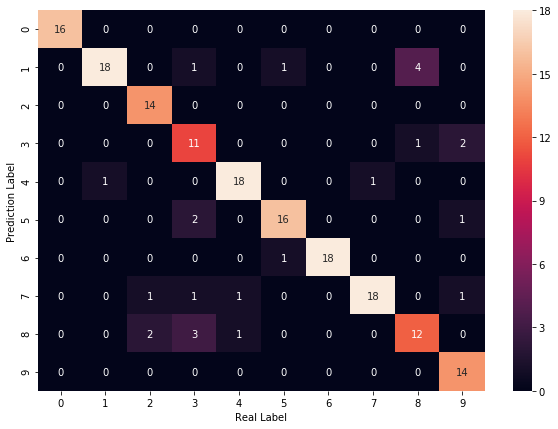

In [19]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [20]:
# 这里反而pred-outputs 的0 是第二类(id是1)，1是第一类（id是0）
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    vote = [0,0,0,0,0,0,0,0,0,0]
    for i in range(45):
        pred_outputs = get_pred_real(i, j)
        #print(i,classes[i],pred_outputs[0][0])
        
        vote_for = classes[i][1 - pred_outputs[0]]
        vote[vote_for] += 1#1 is class 1(id:0) and 0 is class 2(id:1)
    pred_value.append(np.where(vote==np.max(vote)))        
    #print(np.array(pred).T)

In [21]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [22]:
np.sum(list_P == digits.target[:1617])/1617

0.9511440940012369

In [23]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)

In [24]:
np.mean(winner_fitness)

0.98793044301586

In [25]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:1022 Total connections::1242
